
# Decision Tree — Decision Boundaries & Hyperparameters

This notebook generates a synthetic 2D dataset and visualizes **Decision Tree** classifiers for multiple configurations:

1) Baseline: `max_depth=None`, `min_samples_leaf=1`, `criterion='gini'`  
2) Max depth sweep: `max_depth ∈ {2, 3, 4, 6, 8, None}`  
3) Minimum samples per leaf: `min_samples_leaf ∈ {1, 5, 20, 100}`  
4) Criterion: `gini` vs `entropy` vs `log_loss`  
5) Class weighting: `class_weight='balanced'`  
6) Cost-complexity pruning: `ccp_alpha ∈ {0.0, 0.001, 0.01}`

Each configuration is trained and plotted with:
- **Decision regions** (predicted class)
- **Probability contours** (levels 0.1, 0.3, 0.5, 0.7, 0.9)
- **Training and test points**
Additionally, a small tree visualization (depth≤3) is included to show the top rules.


In [1]:

import numpy as np
import matplotlib.pyplot as plt, warnings

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

np.random.seed(13)
warnings.filterwarnings("ignore")

# Generate a nonlinear dataset
X, y = make_moons(n_samples=200, noise=0.5, random_state=13)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=13, stratify=y
)

def plot_boundary_dt(clf, X_tr, y_tr, X_te, y_te, title):
    # Grid
    x_min, x_max = X[:,0].min()-0.8, X[:,0].max()+0.8
    y_min, y_max = X[:,1].min()-0.8, X[:,1].max()+0.8
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    XY = np.c_[xx.ravel(), yy.ravel()]

    # Predict probabilities for class 1
    P = clf.predict_proba(XY)[:,1].reshape(xx.shape)

    # Plot decision regions and probability contours
    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, P>=0.5, alpha=0.15)
    CS = plt.contour(xx, yy, P, levels=[0.1,0.3,0.5,0.7,0.9], linestyles=["--","--","-","--","--"])
    plt.clabel(CS, inline=True, fontsize=8, fmt="p=%.1f")

    # Points
    plt.scatter(X_tr[:,0], X_tr[:,1], s=12, alpha=0.7, label="train")
    plt.scatter(X_te[:,0], X_te[:,1], s=16, alpha=0.9, marker="x", label="test")

    acc_tr = accuracy_score(y_tr, clf.predict(X_tr))
    acc_te = accuracy_score(y_te, clf.predict(X_te))
    plt.title(f"{title}")
    print(f"{title}\naccuracy(train)={acc_tr:.3f} | accuracy(test)={acc_te:.3f}")
    plt.xlabel("x1"); plt.ylabel("x2"); plt.legend(loc="lower right")
    plt.tight_layout(); plt.show()


## 1) Baseline: gini, max_depth=None, min_samples_leaf=1

DecisionTree (gini), max_depth=None, min_samples_leaf=1
accuracy(train)=1.000 | accuracy(test)=0.780


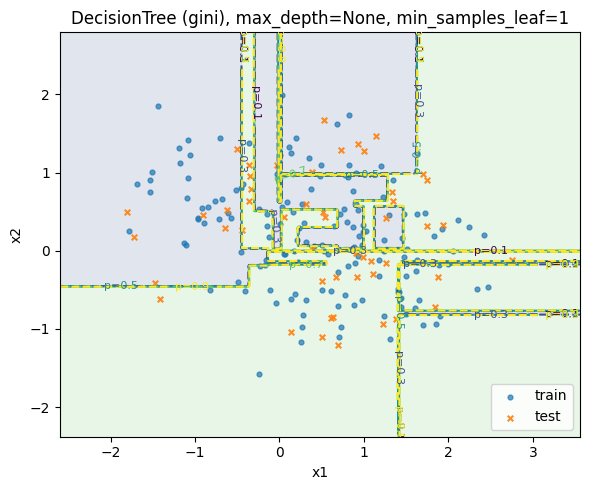

In [2]:

tree_base = DecisionTreeClassifier(criterion="gini", max_depth=None, min_samples_leaf=1, random_state=13)
tree_base.fit(X_train, y_train)
plot_boundary_dt(tree_base, X_train, y_train, X_test, y_test, "DecisionTree (gini), max_depth=None, min_samples_leaf=1")


## 2) Max depth sweep

DecisionTree (gini), max_depth=2
accuracy(train)=0.827 | accuracy(test)=0.960


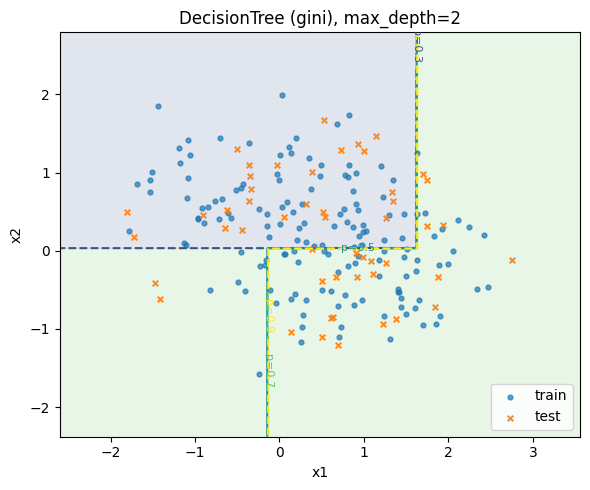

DecisionTree (gini), max_depth=3
accuracy(train)=0.847 | accuracy(test)=0.940


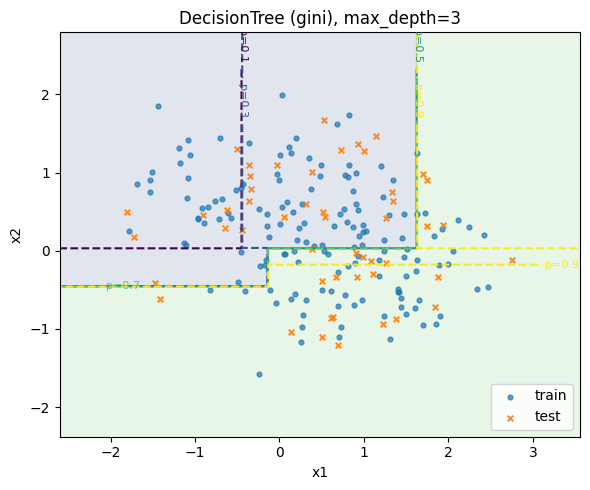

DecisionTree (gini), max_depth=4
accuracy(train)=0.880 | accuracy(test)=0.800


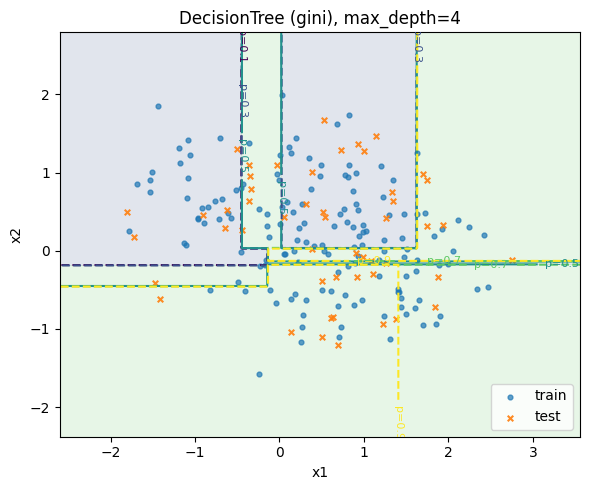

DecisionTree (gini), max_depth=6
accuracy(train)=0.920 | accuracy(test)=0.820


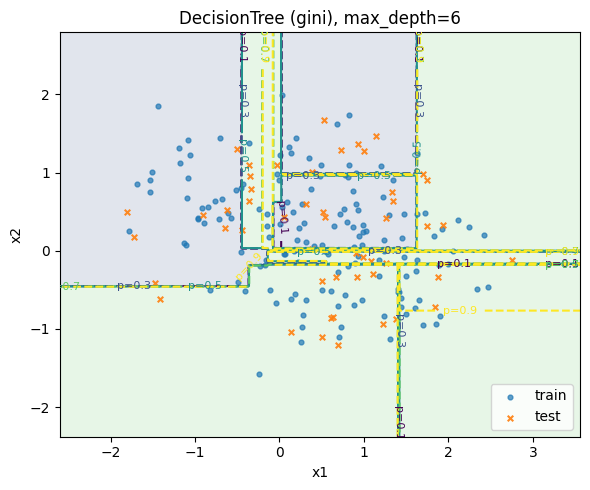

DecisionTree (gini), max_depth=8
accuracy(train)=0.947 | accuracy(test)=0.840


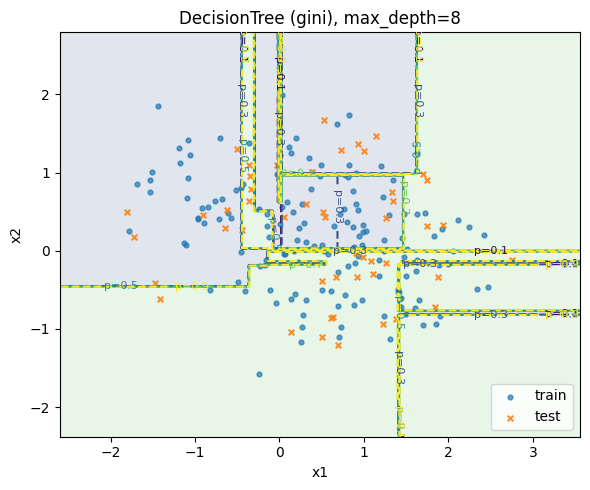

DecisionTree (gini), max_depth=None
accuracy(train)=1.000 | accuracy(test)=0.780


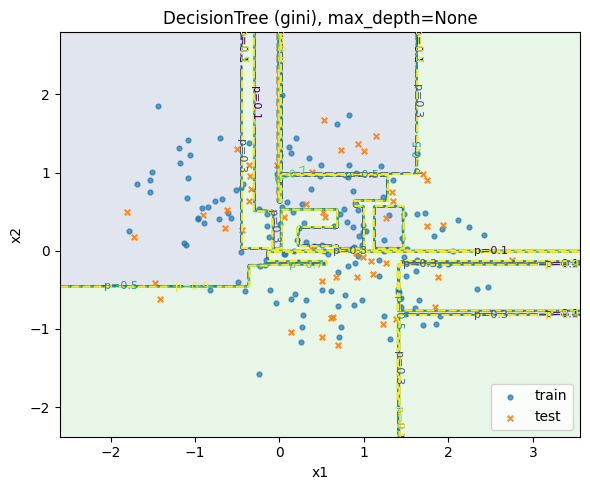

In [3]:

for d in [2, 3, 4, 6, 8, None]:
    tree = DecisionTreeClassifier(criterion="gini", max_depth=d, min_samples_leaf=1, random_state=13)
    tree.fit(X_train, y_train)
    plot_boundary_dt(tree, X_train, y_train, X_test, y_test, f"DecisionTree (gini), max_depth={d}")


## 3) Minimum samples per leaf sweep

DecisionTree (gini), min_samples_leaf=1
accuracy(train)=1.000 | accuracy(test)=0.780


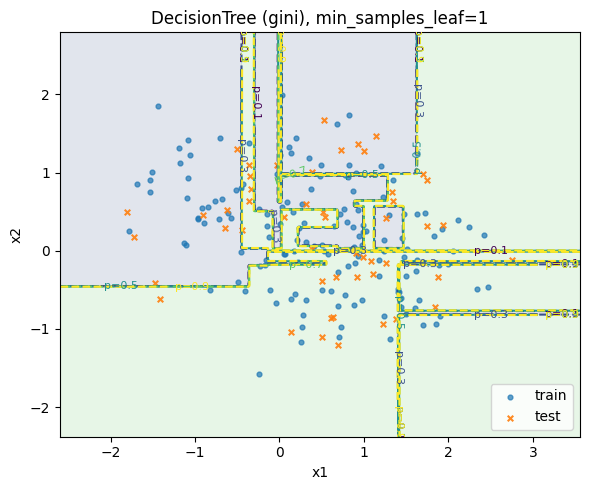

DecisionTree (gini), min_samples_leaf=5
accuracy(train)=0.860 | accuracy(test)=0.820


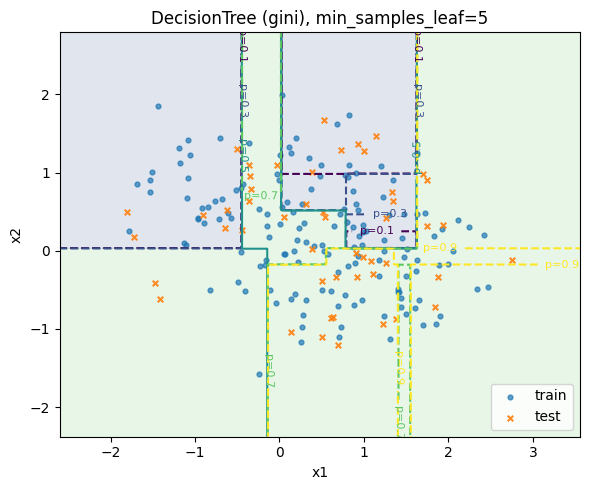

DecisionTree (gini), min_samples_leaf=20
accuracy(train)=0.793 | accuracy(test)=0.820


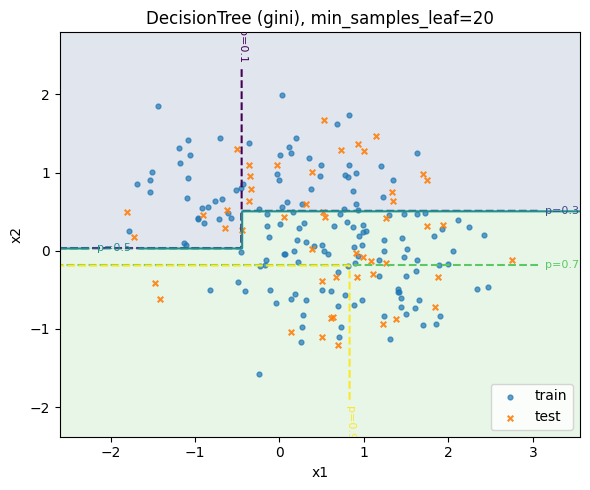

DecisionTree (gini), min_samples_leaf=100
accuracy(train)=0.500 | accuracy(test)=0.500


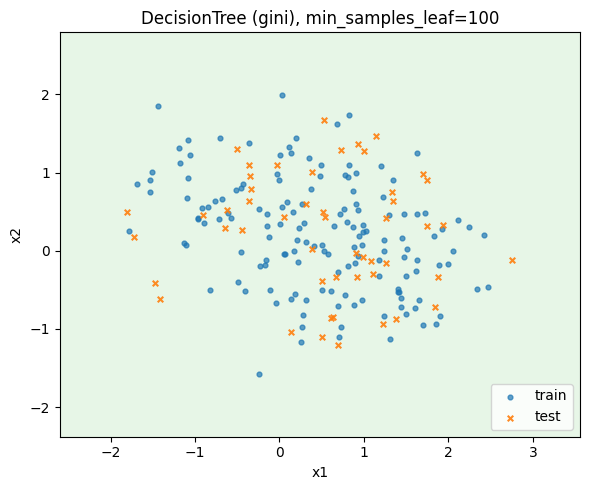

In [4]:

for m in [1, 5, 20, 100]:
    tree = DecisionTreeClassifier(criterion="gini", max_depth=None, min_samples_leaf=m, random_state=13)
    tree.fit(X_train, y_train)
    plot_boundary_dt(tree, X_train, y_train, X_test, y_test, f"DecisionTree (gini), min_samples_leaf={m}")


## 4) Criterion: gini vs entropy vs log_loss

DecisionTree (criterion=gini)
accuracy(train)=1.000 | accuracy(test)=0.780


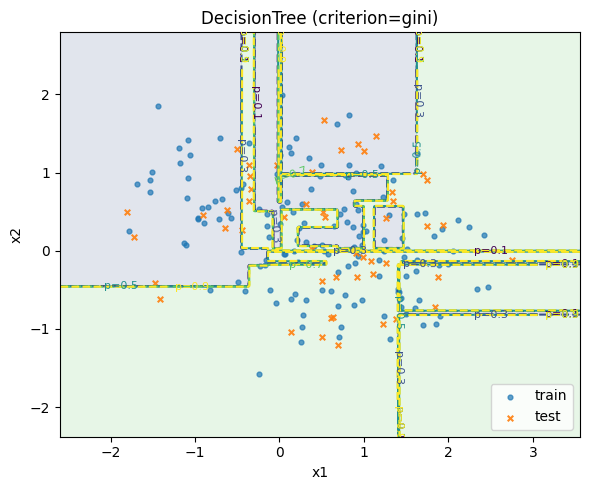

DecisionTree (criterion=entropy)
accuracy(train)=1.000 | accuracy(test)=0.760


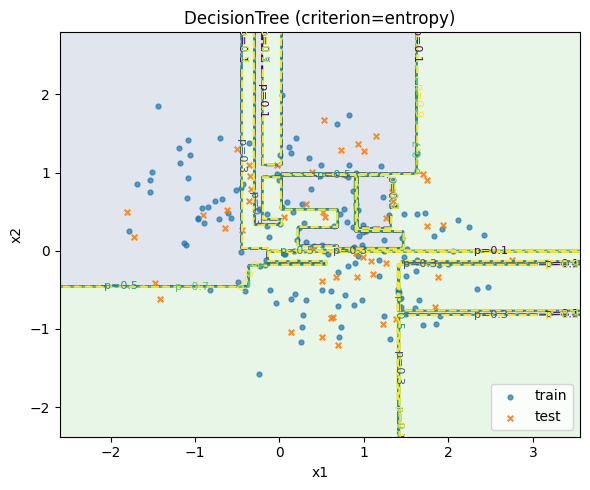

DecisionTree (criterion=log_loss)
accuracy(train)=1.000 | accuracy(test)=0.760


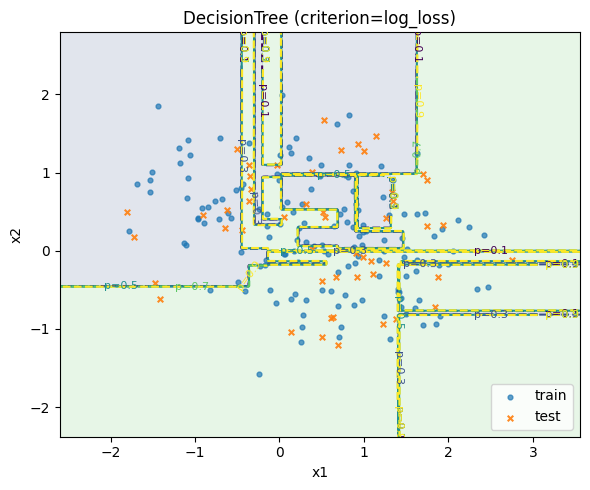

In [5]:

for crit in ["gini", "entropy", "log_loss"]:
    tree = DecisionTreeClassifier(criterion=crit, max_depth=None, min_samples_leaf=1, random_state=13)
    tree.fit(X_train, y_train)
    plot_boundary_dt(tree, X_train, y_train, X_test, y_test, f"DecisionTree (criterion={crit})")


## 5) Class weighting: balanced

DecisionTree (gini), class_weight=balanced
accuracy(train)=1.000 | accuracy(test)=0.780


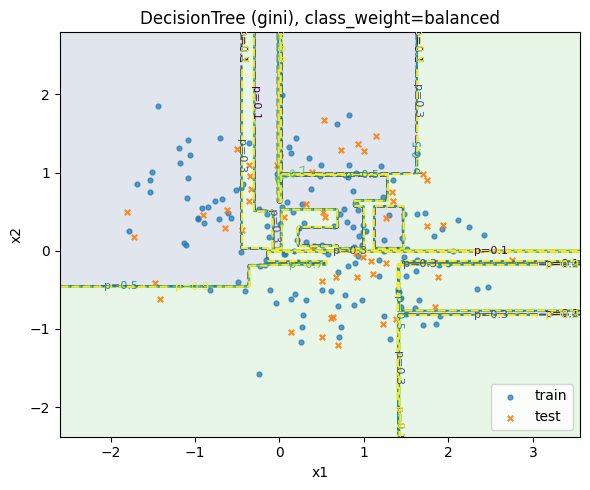

In [6]:

tree_bal = DecisionTreeClassifier(criterion="gini", class_weight="balanced", random_state=13)
tree_bal.fit(X_train, y_train)
plot_boundary_dt(tree_bal, X_train, y_train, X_test, y_test, "DecisionTree (gini), class_weight=balanced")


## 6) Pruning: ccp_alpha sweep

DecisionTree (gini), ccp_alpha=0.0
accuracy(train)=1.000 | accuracy(test)=0.780


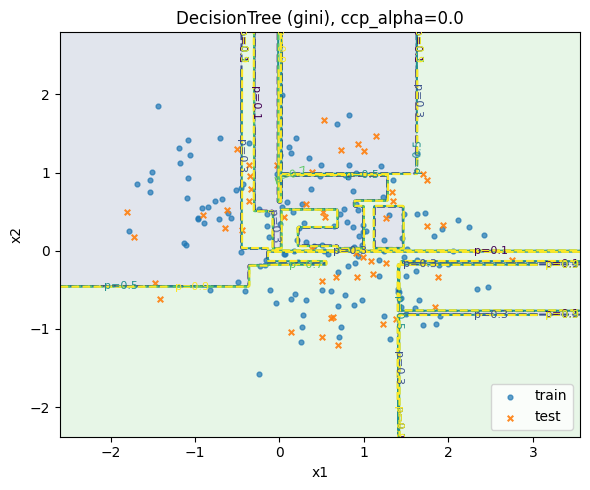

DecisionTree (gini), ccp_alpha=0.001
accuracy(train)=1.000 | accuracy(test)=0.780


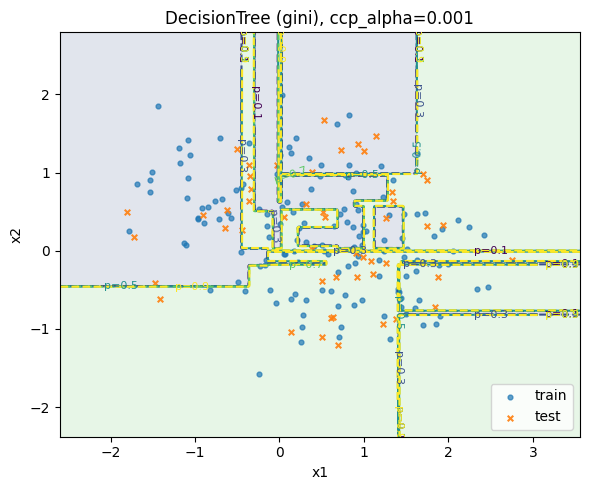

DecisionTree (gini), ccp_alpha=0.01
accuracy(train)=0.873 | accuracy(test)=0.820


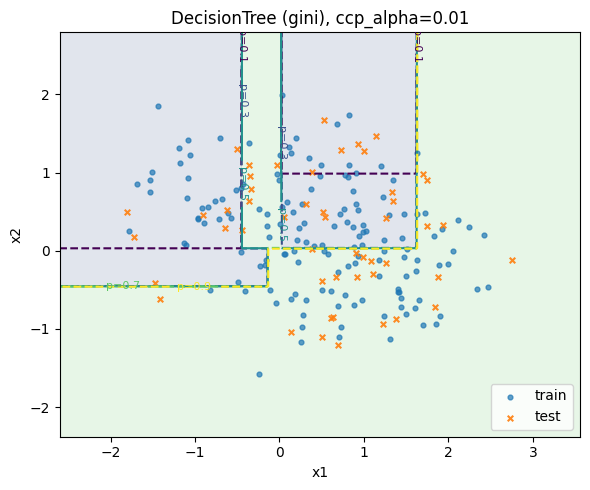

In [7]:

for alpha in [0.0, 0.001, 0.01]:
    tree = DecisionTreeClassifier(criterion="gini", ccp_alpha=alpha, random_state=13)
    tree.fit(X_train, y_train)
    plot_boundary_dt(tree, X_train, y_train, X_test, y_test, f"DecisionTree (gini), ccp_alpha={alpha}")


## Appendix — Visualize top of the tree (depth ≤ 3)

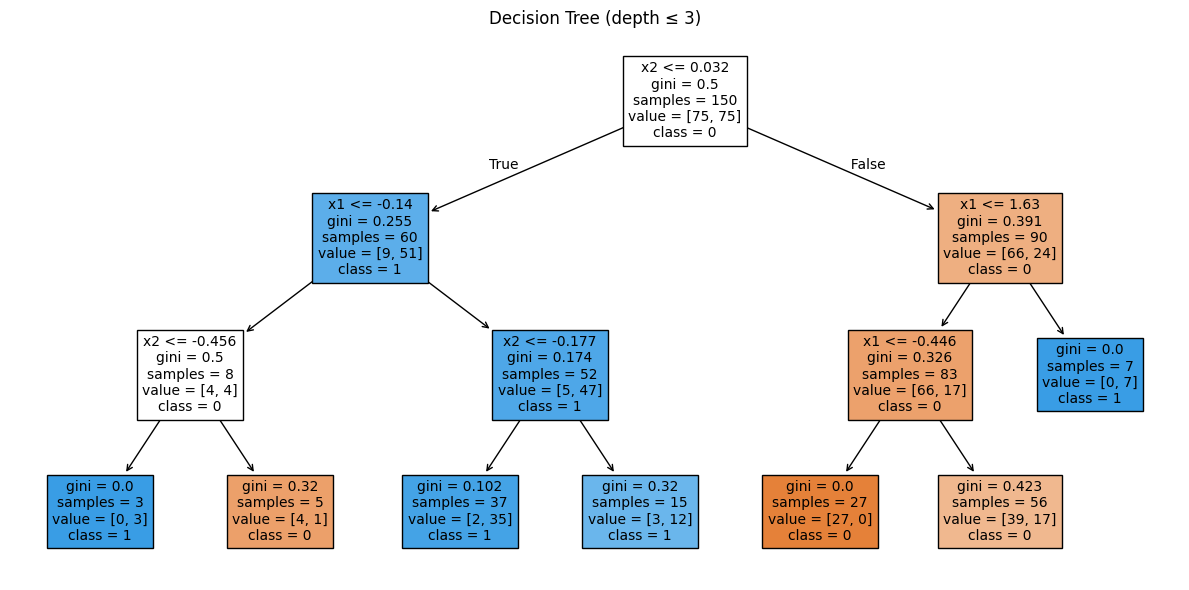

In [8]:

small_tree = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=13)
small_tree.fit(X_train, y_train)

plt.figure(figsize=(12,6))
plot_tree(small_tree, max_depth=3, filled=True, feature_names=["x1","x2"], class_names=["0","1"], fontsize=10)
plt.title("Decision Tree (depth ≤ 3)")
plt.tight_layout(); plt.show()
